In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load data from Excel file
data = pd.read_excel("./data/Census2012.xlsx")

# Features and target variable
X = data[['Income to Poverty Level Ratio', 'Median House Value', 'Per Capita Income vs Pop', 'GED Ratio']]
y = data['Vote Skew']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=20)

# Fitting the model
knn_regressor.fit(X_train, y_train)

# Making predictions
predictions = knn_regressor.predict(X_test)

# Evaluating the model
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Tallying up the predicted vote skew values
total_predicted_skew = predictions.sum()
print(f'Total Predicted Vote Skew: {total_predicted_skew}')

# Displaying some predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results.head())

Root Mean Squared Error: 7204.267689356595
Total Predicted Vote Skew: 53800.950000000004
     Actual  Predicted
51    -4264   -2722.05
69    -7112   -2234.65
31     -785    3437.40
42    19145    1824.80
117   23870    5692.45


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Load data from Excel file
data = pd.read_excel("./data/Census2012.xlsx")

# Features and target variable
X = data[['Income to Poverty Level Ratio', 'Median House Value', 'Per Capita Income vs Pop', 'GED Ratio']]
y = data['Vote Skew']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the KNN regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=20)

# Fitting the model on the scaled training data
knn_regressor.fit(X_train_scaled, y_train)

# Making predictions on the scaled test data
predictions = knn_regressor.predict(X_test_scaled)

# Calculating R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

# Displaying some predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results.head())

R-squared: 0.2661528359121701
     Actual  Predicted
51    -4264   -2336.45
69    -7112    3695.90
31     -785    2511.90
42    19145    4768.90
117   23870    4805.00


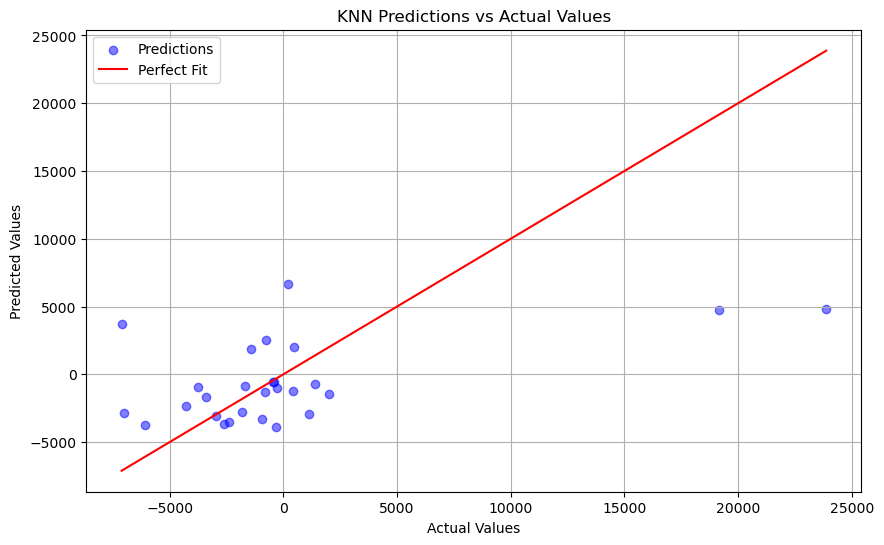

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()